# Analyse du Dataset : Données de Fonctionnement de Véhicule avec Température Ambiante

## Objectif
Ce notebook présente une analyse structurée du dataset contenant les données de fonctionnement d'un véhicule avec les conditions environnementales (température ambiante, pression, humidité).

## Structure de l'analyse
1. **Chargement et présentation du dataset**
2. **Nettoyage des données**
3. **Analyse exploratoire**
4. **Visualisations**


In [67]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration de l'affichage
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuration du style matplotlib (compatible avec différentes versions)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
        
sns.set_palette("husl")

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliothèques importées avec succès!")


Bibliothèques importées avec succès!


## 1. Chargement et Présentation du Dataset


In [68]:
# Chargement du dataset
df = pd.read_csv('Vehicle operating data with ambient temperature.csv')

# Affichage des informations de base
print("=" * 60)
print("INFORMATIONS GÉNÉRALES DU DATASET")
print("=" * 60)
print(f"\n📊 Dimensions du dataset: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"💾 Taille en mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n📋 Colonnes disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n" + "=" * 60)


INFORMATIONS GÉNÉRALES DU DATASET

📊 Dimensions du dataset: 1,282,033 lignes × 9 colonnes
💾 Taille en mémoire: 161.39 MB

📋 Colonnes disponibles:
   1. TIME
   2. PRS (kPa)
   3. TEM (℃)
   4. RHU (%)
   5. HI (℃)
   6. SPEED (km/h)
   7. ACC (m/s2)
   8. FCR (ml/s)
   9. VSP (kW/ton)



In [69]:
# Affichage des premières lignes
print("Premières lignes du dataset:")
print("=" * 60)
df.head(10)


Premières lignes du dataset:


,TIME,PRS (kPa),TEM (℃),RHU (%),HI (℃),SPEED (km/h),ACC (m/s2),FCR (ml/s),VSP (kW/ton)
0,2022-05-13 13:08:11,1007.5,21.9,13,21.900000,81.980624,-0.074368,3.4,4.436857
1,2022-02-05 13:15:42,1029.8,1.3,17,1.300000,5.713967,-0.055675,0.4,0.113897
2,2022-03-21 14:10:29,1019.7,11.9,15,11.900000,8.298537,0.077308,0.3,0.504408
3,2022-09-27 19:42:21,1008.5,22.6,54,22.600000,18.554211,-0.704937,0.4,-3.276558
4,2022-04-13 10:12:33,1016.2,15.1,33,15.100000,34.989316,0.052103,1.1,2.098442
5,2022-07-15 19:57:16,994.3,32.9,40,33.626014,41.003284,1.283915,2.5,18.004022
6,2022-08-31 10:41:51,1008.6,27.7,37,27.700000,47.057040,0.847447,2.1,14.536029
7,2021-10-03 15:17:33,1005.0,21.2,88,21.200000,59.818709,-0.321453,3.1,-2.400217
8,2021-09-11 17:12:18,1003.5,30.1,58,32.623885,0.000000,0.000000,0.3,0.000000
9,2022-08-29 16:36:29,1008.8,21.8,69,21.800000,46.916036,-0.015261,0.3,2.121448


In [70]:
# Informations sur les types de données et valeurs manquantes
print("=" * 60)
print("INFORMATIONS DÉTAILLÉES SUR LES COLONNES")
print("=" * 60)
print("\nTypes de données:")
print(df.dtypes)
print("\n" + "-" * 60)
print("\nValeurs manquantes:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct.round(2)
})
print(missing_df[missing_df['Valeurs manquantes'] > 0])
if missing_df['Valeurs manquantes'].sum() == 0:
    print("Aucune valeur manquante détectée!")


INFORMATIONS DÉTAILLÉES SUR LES COLONNES

Types de données:
TIME             object
PRS (kPa)       float64
TEM (℃)         float64
RHU (%)           int64
HI (℃)          float64
SPEED (km/h)    float64
ACC (m/s2)      float64
FCR (ml/s)      float64
VSP (kW/ton)    float64
dtype: object

------------------------------------------------------------

Valeurs manquantes:
Empty DataFrame
Columns: [Valeurs manquantes, Pourcentage (%)]
Index: []
Aucune valeur manquante détectée!


In [71]:
# Statistiques descriptives
print("=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
df.describe()


STATISTIQUES DESCRIPTIVES


,PRS (kPa),TEM (℃),RHU (%),HI (℃),SPEED (km/h),ACC (m/s2),FCR (ml/s),VSP (kW/ton)
count,1.282033e+06,1.282033e+06,1.282033e+06,1.282033e+06,1.282033e+06,1.282033e+06,1.282033e+06,1.282033e+06
mean,1.013161e+03,1.512724e+01,5.022907e+01,1.551881e+01,2.827185e+01,-3.298833e-04,8.118513e-01,1.852892e+00
std,1.024829e+01,1.120698e+01,2.521774e+01,1.183040e+01,2.783203e+01,5.426255e-01,8.804004e-01,5.960382e+00
min,9.872000e+02,-1.060000e+01,7.000000e+00,-1.060000e+01,-4.185045e-01,-1.083382e+01,0.000000e+00,-8.023003e+01
25%,1.004600e+03,5.600000e+00,2.700000e+01,5.600000e+00,8.714572e-01,-1.684704e-01,3.000000e-01,0.000000e+00
50%,1.013600e+03,1.620000e+01,5.000000e+01,1.620000e+01,2.192867e+01,0.000000e+00,5.000000e-01,6.860070e-02
75%,1.021300e+03,2.480000e+01,6.900000e+01,2.480000e+01,4.760502e+01,1.925863e-01,1.000000e+00,3.877077e+00
max,1.043300e+03,3.890000e+01,1.000000e+02,4.888889e+01,1.520117e+02,1.355282e+01,6.380000e+01,2.045328e+02


## 2. Nettoyage des Données


In [72]:
# Création d'une copie pour le nettoyage
df_clean = df.copy()

print("État initial:")
print(f"Nombre de lignes: {len(df_clean):,}")
print(f"Nombre de colonnes: {len(df_clean.columns)}")

# Conversion de la colonne TIME en datetime
print("\n" + "-" * 60)
print("Conversion de la colonne TIME en format datetime...")
df_clean['TIME'] = pd.to_datetime(df_clean['TIME'], errors='coerce')

# Vérification des conversions échouées
failed_conversions = df_clean['TIME'].isnull().sum()
if failed_conversions > 0:
    print(f"{failed_conversions} conversions de date ont échoué")
else:
    print("Toutes les dates ont été converties avec succès")

print(f"\nPlage temporelle:")
print(f"  Début: {df_clean['TIME'].min()}")
print(f"  Fin: {df_clean['TIME'].max()}")
print(f"  Durée: {(df_clean['TIME'].max() - df_clean['TIME'].min()).days} jours")


État initial:
Nombre de lignes: 1,282,033
Nombre de colonnes: 9

------------------------------------------------------------
Conversion de la colonne TIME en format datetime...
Toutes les dates ont été converties avec succès

Plage temporelle:
  Début: 2021-08-31 08:00:30
  Fin: 2022-12-20 21:48:30
  Durée: 476 jours


In [73]:
# Détection des valeurs aberrantes (outliers) avec la méthode IQR
print("=" * 60)
print("DÉTECTION DES VALEURS ABERRANTES")
print("=" * 60)

# Colonnes numériques à analyser (exclure TIME)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'TIME' in numeric_cols:
    numeric_cols.remove('TIME')

outliers_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_pct = (outliers_count / len(df_clean)) * 100
    
    outliers_summary[col] = {
        'count': outliers_count,
        'percentage': outliers_pct,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{col}:")
    print(f"  Valeurs aberrantes: {outliers_count:,} ({outliers_pct:.2f}%)")
    print(f"  Plage normale: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Affichage sous forme de DataFrame
outliers_df = pd.DataFrame(outliers_summary).T
outliers_df = outliers_df.sort_values('percentage', ascending=False)
print("\n" + "-" * 60)
print("Résumé des valeurs aberrantes:")
print(outliers_df[['count', 'percentage']])


DÉTECTION DES VALEURS ABERRANTES

PRS (kPa):
  Valeurs aberrantes: 0 (0.00%)
  Plage normale: [979.55, 1046.35]

TEM (℃):
  Valeurs aberrantes: 0 (0.00%)
  Plage normale: [-23.20, 53.60]

RHU (%):
  Valeurs aberrantes: 0 (0.00%)
  Plage normale: [-36.00, 132.00]

HI (℃):
  Valeurs aberrantes: 0 (0.00%)
  Plage normale: [-23.20, 53.60]

SPEED (km/h):
  Valeurs aberrantes: 1,864 (0.15%)
  Plage normale: [-69.23, 117.71]

ACC (m/s2):
  Valeurs aberrantes: 172,115 (13.43%)
  Plage normale: [-0.71, 0.73]

FCR (ml/s):
  Valeurs aberrantes: 121,666 (9.49%)
  Plage normale: [-0.75, 2.05]

VSP (kW/ton):
  Valeurs aberrantes: 176,839 (13.79%)
  Plage normale: [-5.82, 9.69]

------------------------------------------------------------
Résumé des valeurs aberrantes:
                 count  percentage
VSP (kW/ton)  176839.0   13.793639
ACC (m/s2)    172115.0   13.425161
FCR (ml/s)    121666.0    9.490083
SPEED (km/h)    1864.0    0.145394
PRS (kPa)          0.0    0.000000
TEM (℃)            0.0   

In [74]:
# Nettoyage: Suppression des lignes avec des valeurs manquantes dans TIME
print("=" * 60)
print("NETTOYAGE DES DONNÉES")
print("=" * 60)

initial_rows = len(df_clean)

# Suppression des lignes avec TIME manquant
df_clean = df_clean.dropna(subset=['TIME'])
rows_after_time_clean = len(df_clean)
print(f"Lignes supprimées (TIME manquant): {initial_rows - rows_after_time_clean:,}")

# Vérification des valeurs négatives incohérentes
# RHU (humidité) devrait être entre 0 et 100%
invalid_rhu = df_clean[(df_clean['RHU (%)'] < 0) | (df_clean['RHU (%)'] > 100)]
if len(invalid_rhu) > 0:
    print(f"{len(invalid_rhu)} lignes avec humidité invalide (< 0% ou > 100%)")
    df_clean = df_clean[(df_clean['RHU (%)'] >= 0) & (df_clean['RHU (%)'] <= 100)]

# Vérification des valeurs de vitesse négatives (peuvent être valides si le véhicule recule)
# Mais on va garder toutes les valeurs pour l'instant

# Vérification des valeurs de consommation de carburant négatives
invalid_fcr = df_clean[df_clean['FCR (ml/s)'] < 0]
if len(invalid_fcr) > 0:
    print(f"{len(invalid_fcr)} lignes avec consommation de carburant négative")
    # On peut soit supprimer, soit mettre à 0 - ici on supprime
    df_clean = df_clean[df_clean['FCR (ml/s)'] >= 0]

final_rows = len(df_clean)
print(f"\nNettoyage terminé!")
print(f"   Lignes initiales: {initial_rows:,}")
print(f"   Lignes finales: {final_rows:,}")
print(f"   Lignes supprimées: {initial_rows - final_rows:,} ({(initial_rows - final_rows)/initial_rows*100:.2f}%)")


NETTOYAGE DES DONNÉES
Lignes supprimées (TIME manquant): 0

Nettoyage terminé!
   Lignes initiales: 1,282,033
   Lignes finales: 1,282,033
   Lignes supprimées: 0 (0.00%)


In [75]:
# Ajout de colonnes dérivées utiles pour l'analyse
print("=" * 60)
print("CRÉATION DE COLONNES DÉRIVÉES")
print("=" * 60)

# Extraction de composantes temporelles
df_clean['year'] = df_clean['TIME'].dt.year
df_clean['month'] = df_clean['TIME'].dt.month
df_clean['day'] = df_clean['TIME'].dt.day
df_clean['hour'] = df_clean['TIME'].dt.hour
df_clean['day_of_week'] = df_clean['TIME'].dt.day_name()
df_clean['month_name'] = df_clean['TIME'].dt.month_name()

# Catégorisation de la température
df_clean['temp_category'] = pd.cut(
    df_clean['TEM (℃)'],
    bins=[-np.inf, 0, 10, 20, 30, np.inf],
    labels=['Très froid (<0°C)', 'Froid (0-10°C)', 'Tempéré (10-20°C)', 'Chaud (20-30°C)', 'Très chaud (>30°C)']
)

# Catégorisation de la vitesse
df_clean['speed_category'] = pd.cut(
    df_clean['SPEED (km/h)'],
    bins=[-np.inf, 0, 30, 60, 90, np.inf],
    labels=['Arrêt (0 km/h)', 'Ville (0-30)', 'Route (30-60)', 'Autoroute (60-90)', 'Très rapide (>90)']
)

print("Colonnes dérivées créées:")
print("   - Composantes temporelles (year, month, day, hour, day_of_week, month_name)")
print("   - Catégories de température (temp_category)")
print("   - Catégories de vitesse (speed_category)")


CRÉATION DE COLONNES DÉRIVÉES
Colonnes dérivées créées:
   - Composantes temporelles (year, month, day, hour, day_of_week, month_name)
   - Catégories de température (temp_category)
   - Catégories de vitesse (speed_category)


## 3. Analyse Exploratoire des Données


In [76]:
# Analyse de la distribution des variables principales
print("=" * 60)
print("DISTRIBUTION DES VARIABLES PRINCIPALES")
print("=" * 60)

# Variables d'intérêt pour l'analyse
key_vars = ['TEM (℃)', 'RHU (%)', 'SPEED (km/h)', 'FCR (ml/s)', 'VSP (kW/ton)']

for var in key_vars:
    print(f"\n{var}:")
    print(f"  Moyenne: {df_clean[var].mean():.2f}")
    print(f"  Médiane: {df_clean[var].median():.2f}")
    print(f"  Écart-type: {df_clean[var].std():.2f}")
    print(f"  Min: {df_clean[var].min():.2f}")
    print(f"  Max: {df_clean[var].max():.2f}")
    print(f"  Skewness: {df_clean[var].skew():.2f}")


DISTRIBUTION DES VARIABLES PRINCIPALES

TEM (℃):
  Moyenne: 15.13
  Médiane: 16.20
  Écart-type: 11.21
  Min: -10.60
  Max: 38.90
  Skewness: -0.17

RHU (%):
  Moyenne: 50.23
  Médiane: 50.00
  Écart-type: 25.22
  Min: 7.00
  Max: 100.00
  Skewness: 0.27

SPEED (km/h):
  Moyenne: 28.27
  Médiane: 21.93
  Écart-type: 27.83
  Min: -0.42
  Max: 152.01
  Skewness: 0.84

FCR (ml/s):
  Moyenne: 0.81
  Médiane: 0.50
  Écart-type: 0.88
  Min: 0.00
  Max: 63.80
  Skewness: 3.53

VSP (kW/ton):
  Moyenne: 1.85
  Médiane: 0.07
  Écart-type: 5.96
  Min: -80.23
  Max: 204.53
  Skewness: 0.62


In [77]:
# Analyse temporelle
print("=" * 60)
print("ANALYSE TEMPORELLE")
print("=" * 60)

print(f"\nPériode couverte:")
print(f"   Du {df_clean['TIME'].min()} au {df_clean['TIME'].max()}")
print(f"   Durée totale: {(df_clean['TIME'].max() - df_clean['TIME'].min()).days} jours")

print(f"\nRépartition par année:")
print(df_clean['year'].value_counts().sort_index())

print(f"\nRépartition par mois:")
month_counts = df_clean['month_name'].value_counts()
print(month_counts)

print(f"\nRépartition par jour de la semaine:")
day_counts = df_clean['day_of_week'].value_counts()
print(day_counts)


ANALYSE TEMPORELLE

Période couverte:
   Du 2021-08-31 08:00:30 au 2022-12-20 21:48:30
   Durée totale: 476 jours

Répartition par année:
year
2021    349443
2022    932590
Name: count, dtype: int64

Répartition par mois:
month_name
September    191348
October      160513
January      126159
November     121682
August       111655
July         101083
March         94639
February      90400
December      88335
April         75536
June          70942
May           49741
Name: count, dtype: int64

Répartition par jour de la semaine:
day_of_week
Saturday     203343
Friday       193540
Sunday       184996
Tuesday      176563
Thursday     176168
Wednesday    175859
Monday       171564
Name: count, dtype: int64


In [78]:
# Matrice de corrélation
print("=" * 60)
print("ANALYSE DES CORRÉLATIONS")
print("=" * 60)

# Sélection des colonnes numériques pour la corrélation
corr_cols = ['PRS (kPa)', 'TEM (℃)', 'RHU (%)', 'HI (℃)', 'SPEED (km/h)', 
             'ACC (m/s2)', 'FCR (ml/s)', 'VSP (kW/ton)']

correlation_matrix = df_clean[corr_cols].corr()

print("\nCorrélations les plus fortes (> 0.5 ou < -0.5):")
print("-" * 60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")


ANALYSE DES CORRÉLATIONS

Corrélations les plus fortes (> 0.5 ou < -0.5):
------------------------------------------------------------
PRS (kPa) ↔ TEM (℃): -0.835
PRS (kPa) ↔ HI (℃): -0.835
TEM (℃) ↔ HI (℃): 0.993
ACC (m/s2) ↔ VSP (kW/ton): 0.764
FCR (ml/s) ↔ VSP (kW/ton): 0.653


## 4. Visualisations


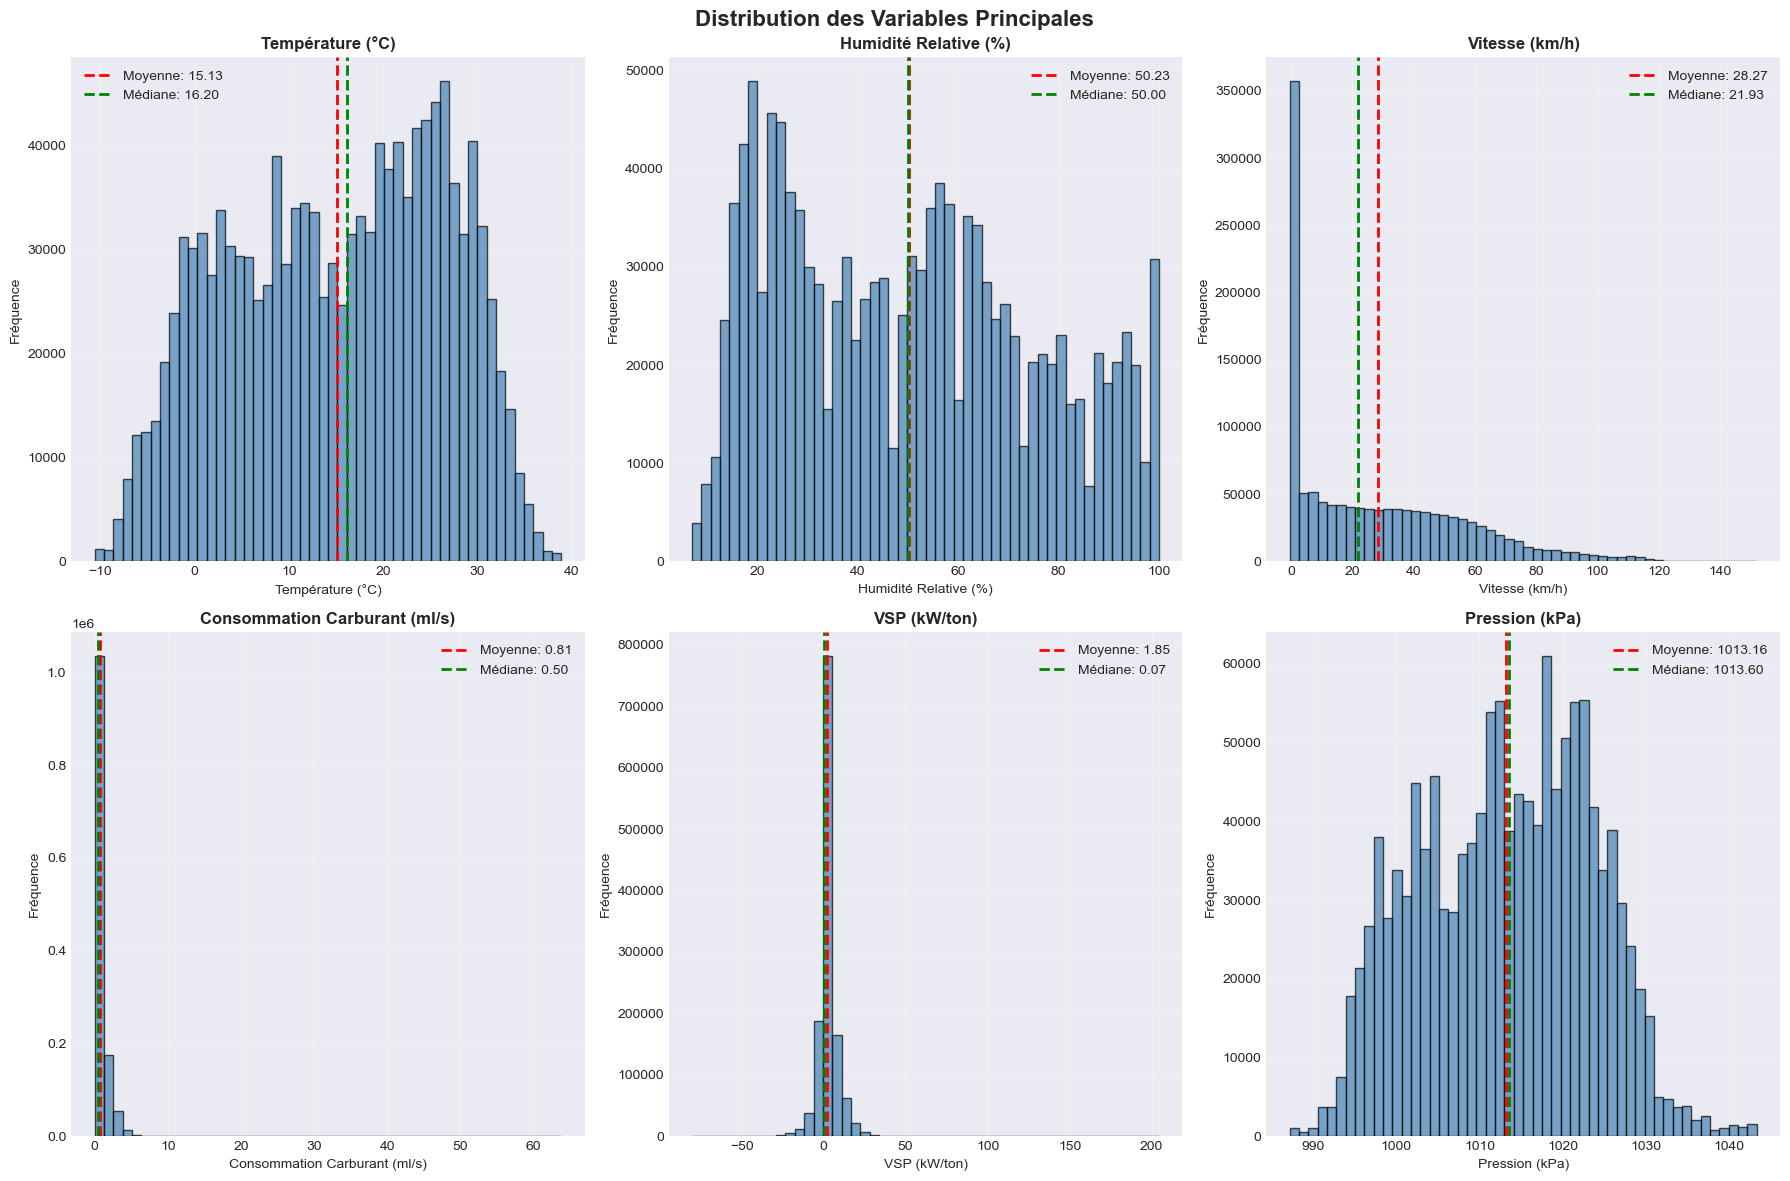

In [79]:
# 1. Distribution des variables principales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution des Variables Principales', fontsize=16, fontweight='bold')

variables = ['TEM (℃)', 'RHU (%)', 'SPEED (km/h)', 'FCR (ml/s)', 'VSP (kW/ton)', 'PRS (kPa)']
titles = ['Température (°C)', 'Humidité Relative (%)', 'Vitesse (km/h)', 
          'Consommation Carburant (ml/s)', 'VSP (kW/ton)', 'Pression (kPa)']

for idx, (var, title) in enumerate(zip(variables, titles)):
    ax = axes[idx // 3, idx % 3]
    
    # Histogramme avec courbe de densité
    ax.hist(df_clean[var].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(df_clean[var].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df_clean[var].mean():.2f}')
    ax.axvline(df_clean[var].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {df_clean[var].median():.2f}')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(title)
    ax.set_ylabel('Fréquence')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


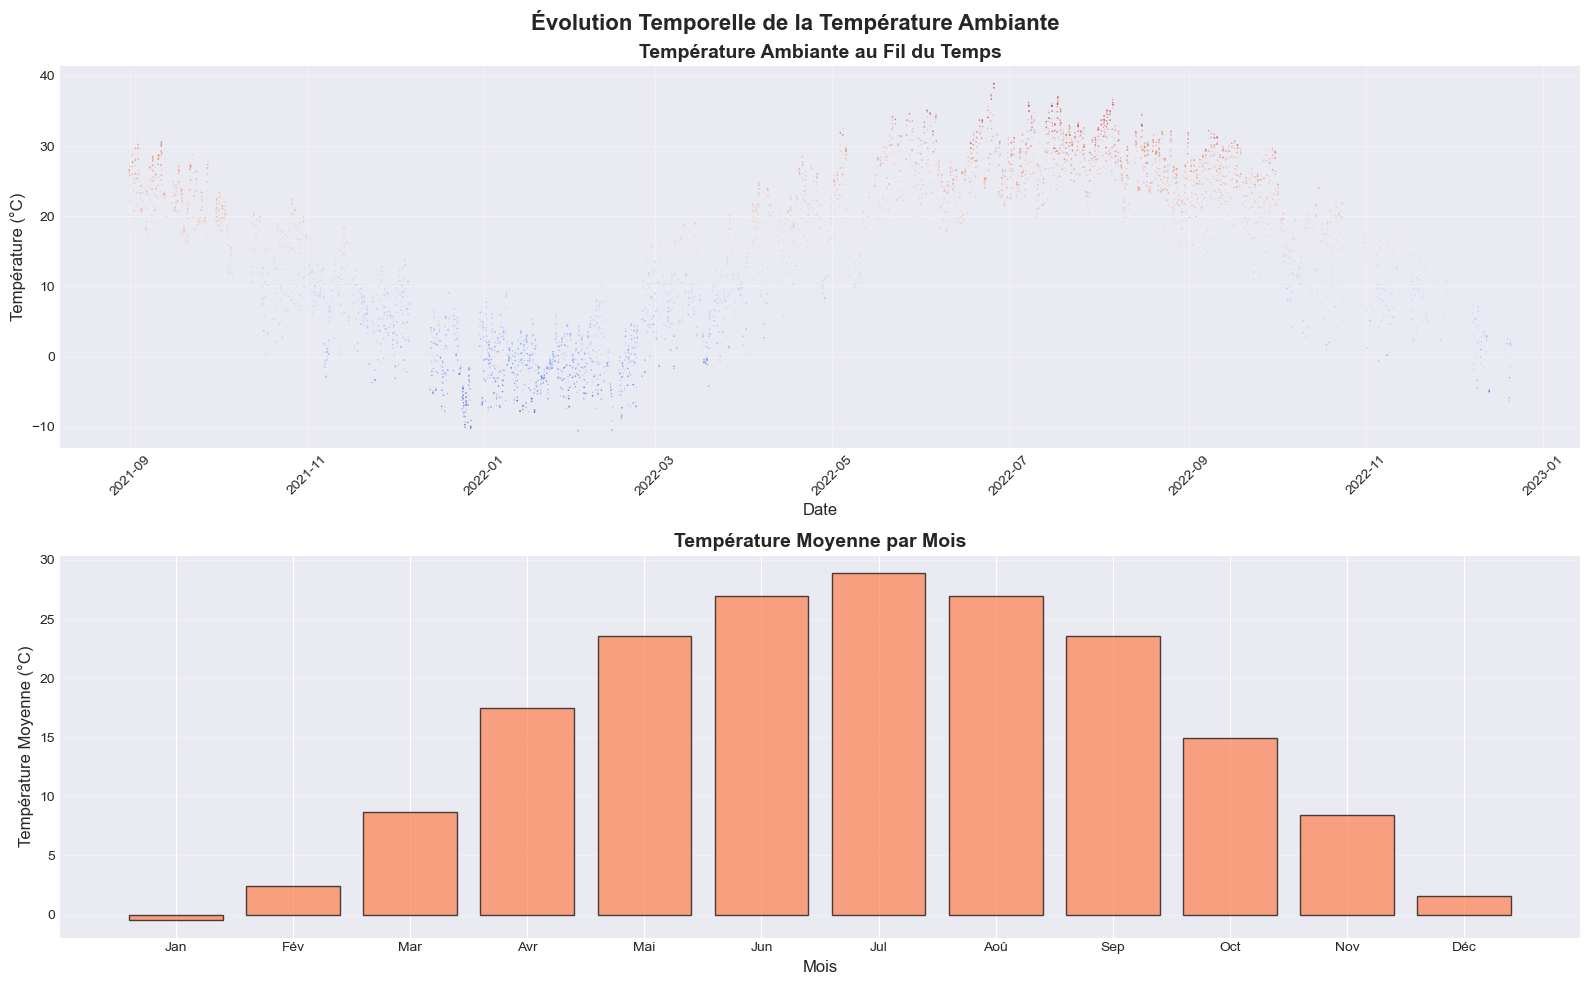

In [80]:
# 2. Évolution temporelle de la température
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Évolution Temporelle de la Température Ambiante', fontsize=16, fontweight='bold')

# Échantillonnage pour améliorer les performances (prendre 1 point sur 100)
df_sample = df_clean.iloc[::100].copy()

# Graphique 1: Température au fil du temps
axes[0].scatter(df_sample['TIME'], df_sample['TEM (℃)'], alpha=0.3, s=1, c=df_sample['TEM (℃)'], 
                cmap='coolwarm', edgecolors='none')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Température (°C)', fontsize=12)
axes[0].set_title('Température Ambiante au Fil du Temps', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Graphique 2: Température moyenne par mois
monthly_temp = df_clean.groupby('month')['TEM (℃)'].mean().sort_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
axes[1].bar(range(1, 13), monthly_temp.values, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Mois', fontsize=12)
axes[1].set_ylabel('Température Moyenne (°C)', fontsize=12)
axes[1].set_title('Température Moyenne par Mois', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


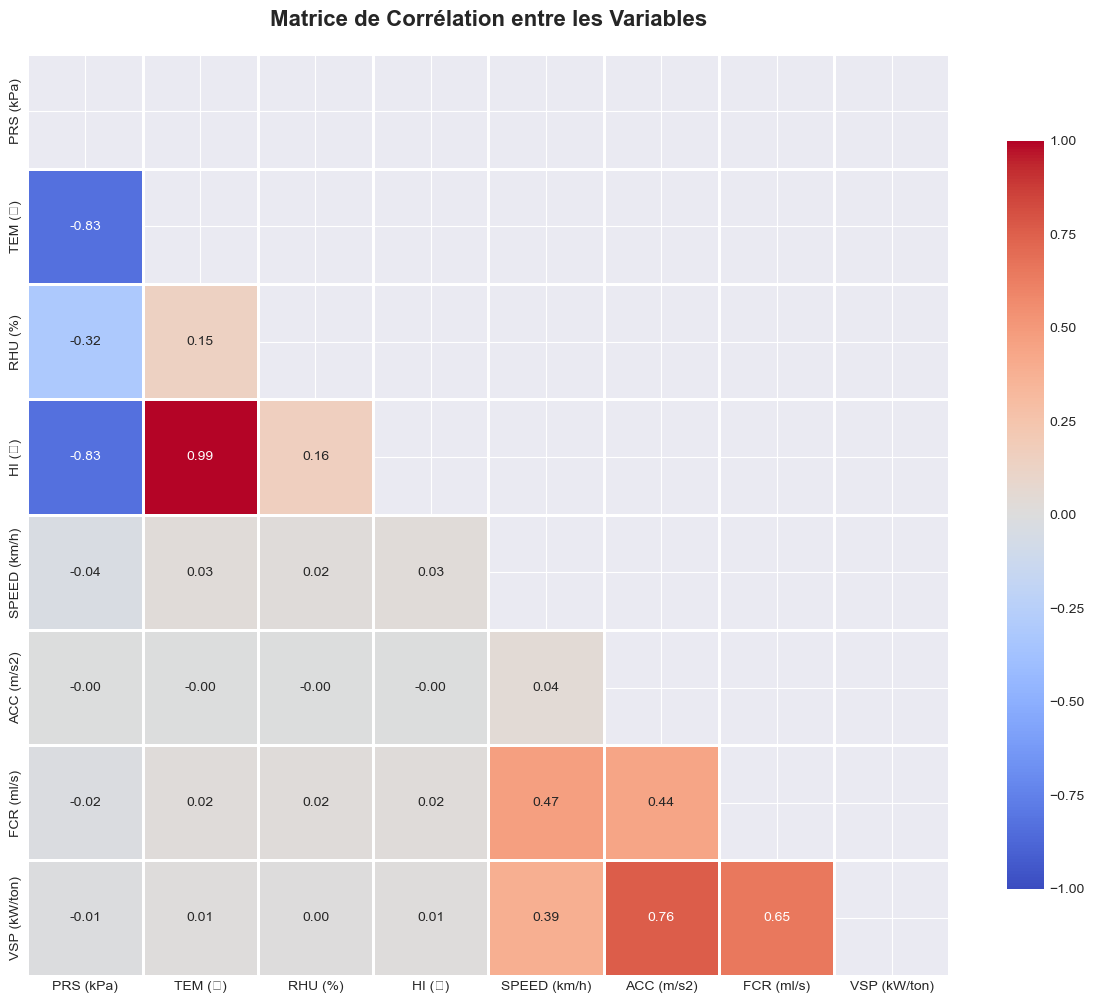

In [81]:
# 3. Matrice de corrélation
fig, ax = plt.subplots(figsize=(12, 10))

# Calcul de la matrice de corrélation
corr_cols = ['PRS (kPa)', 'TEM (℃)', 'RHU (%)', 'HI (℃)', 'SPEED (km/h)', 
             'ACC (m/s2)', 'FCR (ml/s)', 'VSP (kW/ton)']
corr_matrix = df_clean[corr_cols].corr()

# Création du heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Masquer la partie supérieure
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Matrice de Corrélation entre les Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


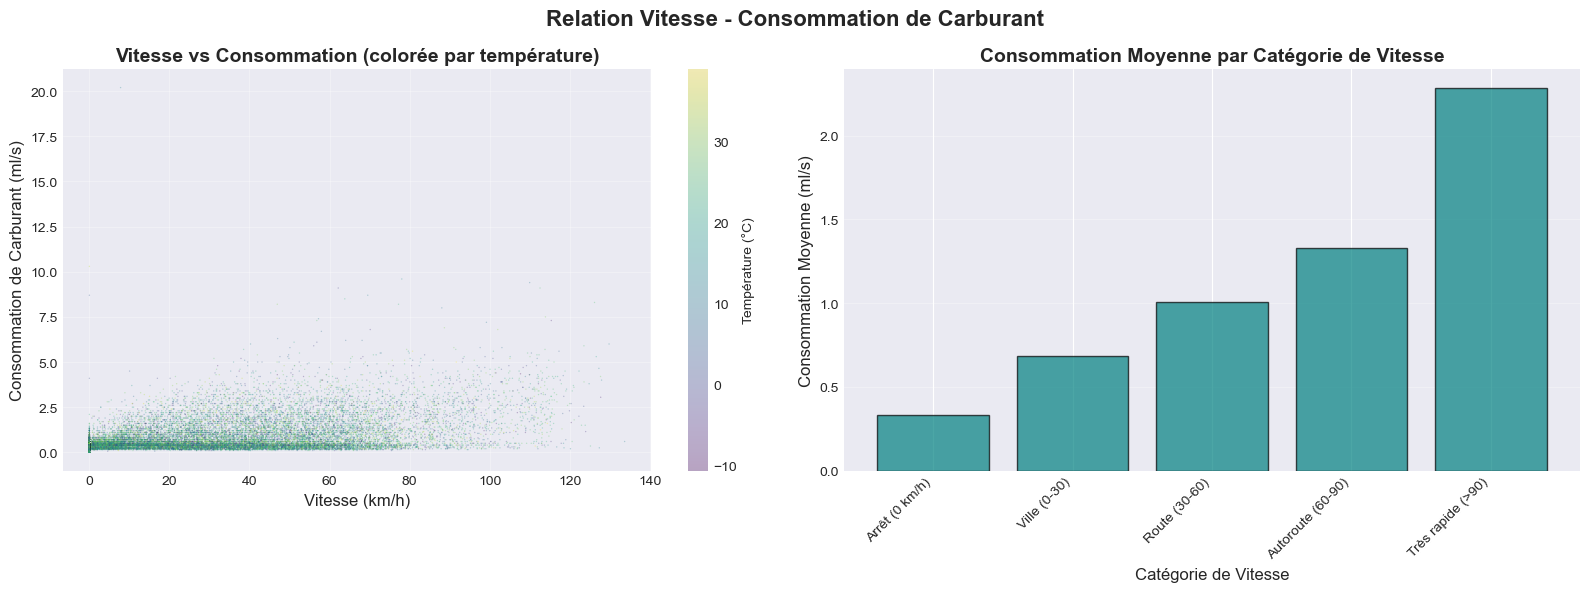

In [82]:
# 4. Relation entre vitesse et consommation de carburant
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relation Vitesse - Consommation de Carburant', fontsize=16, fontweight='bold')

# Échantillonnage pour améliorer les performances
df_sample = df_clean.iloc[::50].copy()

# Graphique 1: Scatter plot
axes[0].scatter(df_sample['SPEED (km/h)'], df_sample['FCR (ml/s)'], 
                alpha=0.3, s=1, c=df_sample['TEM (℃)'], cmap='viridis', edgecolors='none')
axes[0].set_xlabel('Vitesse (km/h)', fontsize=12)
axes[0].set_ylabel('Consommation de Carburant (ml/s)', fontsize=12)
axes[0].set_title('Vitesse vs Consommation (colorée par température)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar.set_label('Température (°C)', fontsize=10)

# Graphique 2: Consommation moyenne par catégorie de vitesse
speed_fcr = df_clean.groupby('speed_category')['FCR (ml/s)'].mean()
axes[1].bar(range(len(speed_fcr)), speed_fcr.values, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Catégorie de Vitesse', fontsize=12)
axes[1].set_ylabel('Consommation Moyenne (ml/s)', fontsize=12)
axes[1].set_title('Consommation Moyenne par Catégorie de Vitesse', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(speed_fcr)))
axes[1].set_xticklabels(speed_fcr.index, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


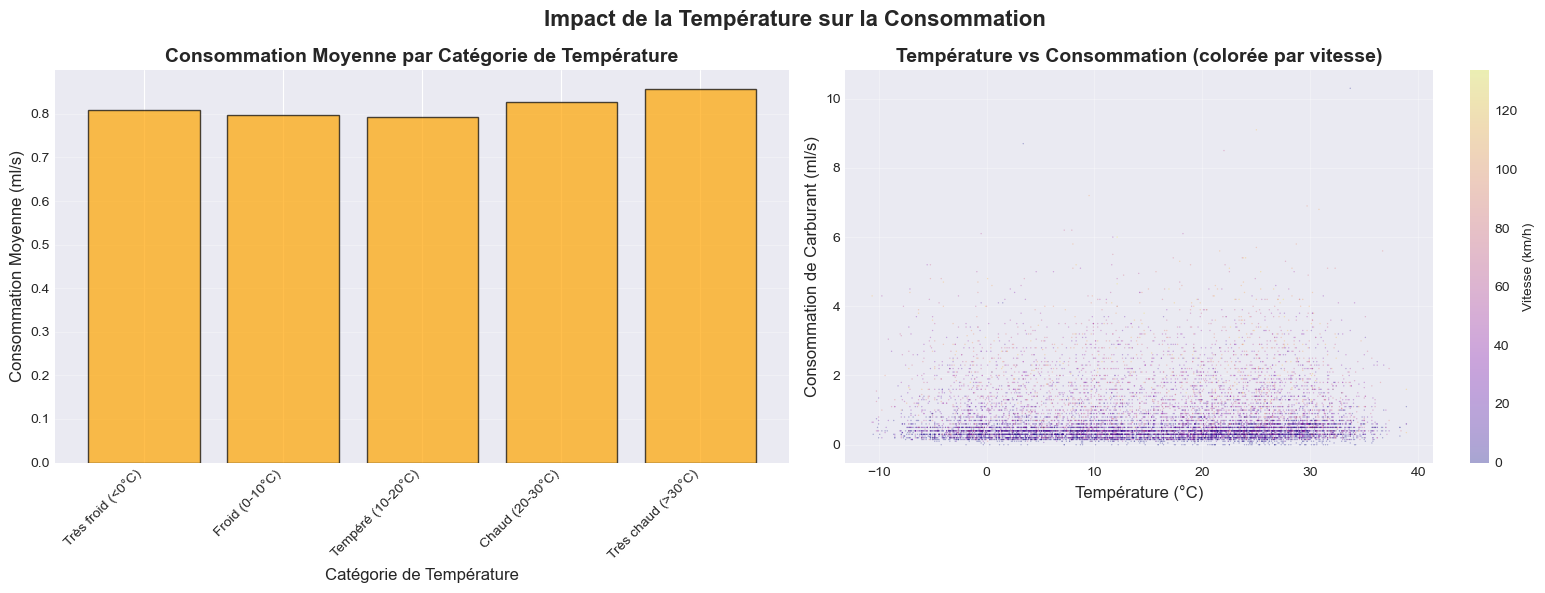

In [83]:
# 5. Impact de la température sur la consommation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Impact de la Température sur la Consommation', fontsize=16, fontweight='bold')

# Graphique 1: Consommation moyenne par catégorie de température
temp_fcr = df_clean.groupby('temp_category')['FCR (ml/s)'].mean().sort_index()
axes[0].bar(range(len(temp_fcr)), temp_fcr.values, color='orange', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Catégorie de Température', fontsize=12)
axes[0].set_ylabel('Consommation Moyenne (ml/s)', fontsize=12)
axes[0].set_title('Consommation Moyenne par Catégorie de Température', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(temp_fcr)))
axes[0].set_xticklabels(temp_fcr.index, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Scatter plot température vs consommation
df_sample = df_clean.iloc[::100].copy()
axes[1].scatter(df_sample['TEM (℃)'], df_sample['FCR (ml/s)'], 
                alpha=0.3, s=1, c=df_sample['SPEED (km/h)'], cmap='plasma', edgecolors='none')
axes[1].set_xlabel('Température (°C)', fontsize=12)
axes[1].set_ylabel('Consommation de Carburant (ml/s)', fontsize=12)
axes[1].set_title('Température vs Consommation (colorée par vitesse)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('Vitesse (km/h)', fontsize=10)

plt.tight_layout()
plt.show()


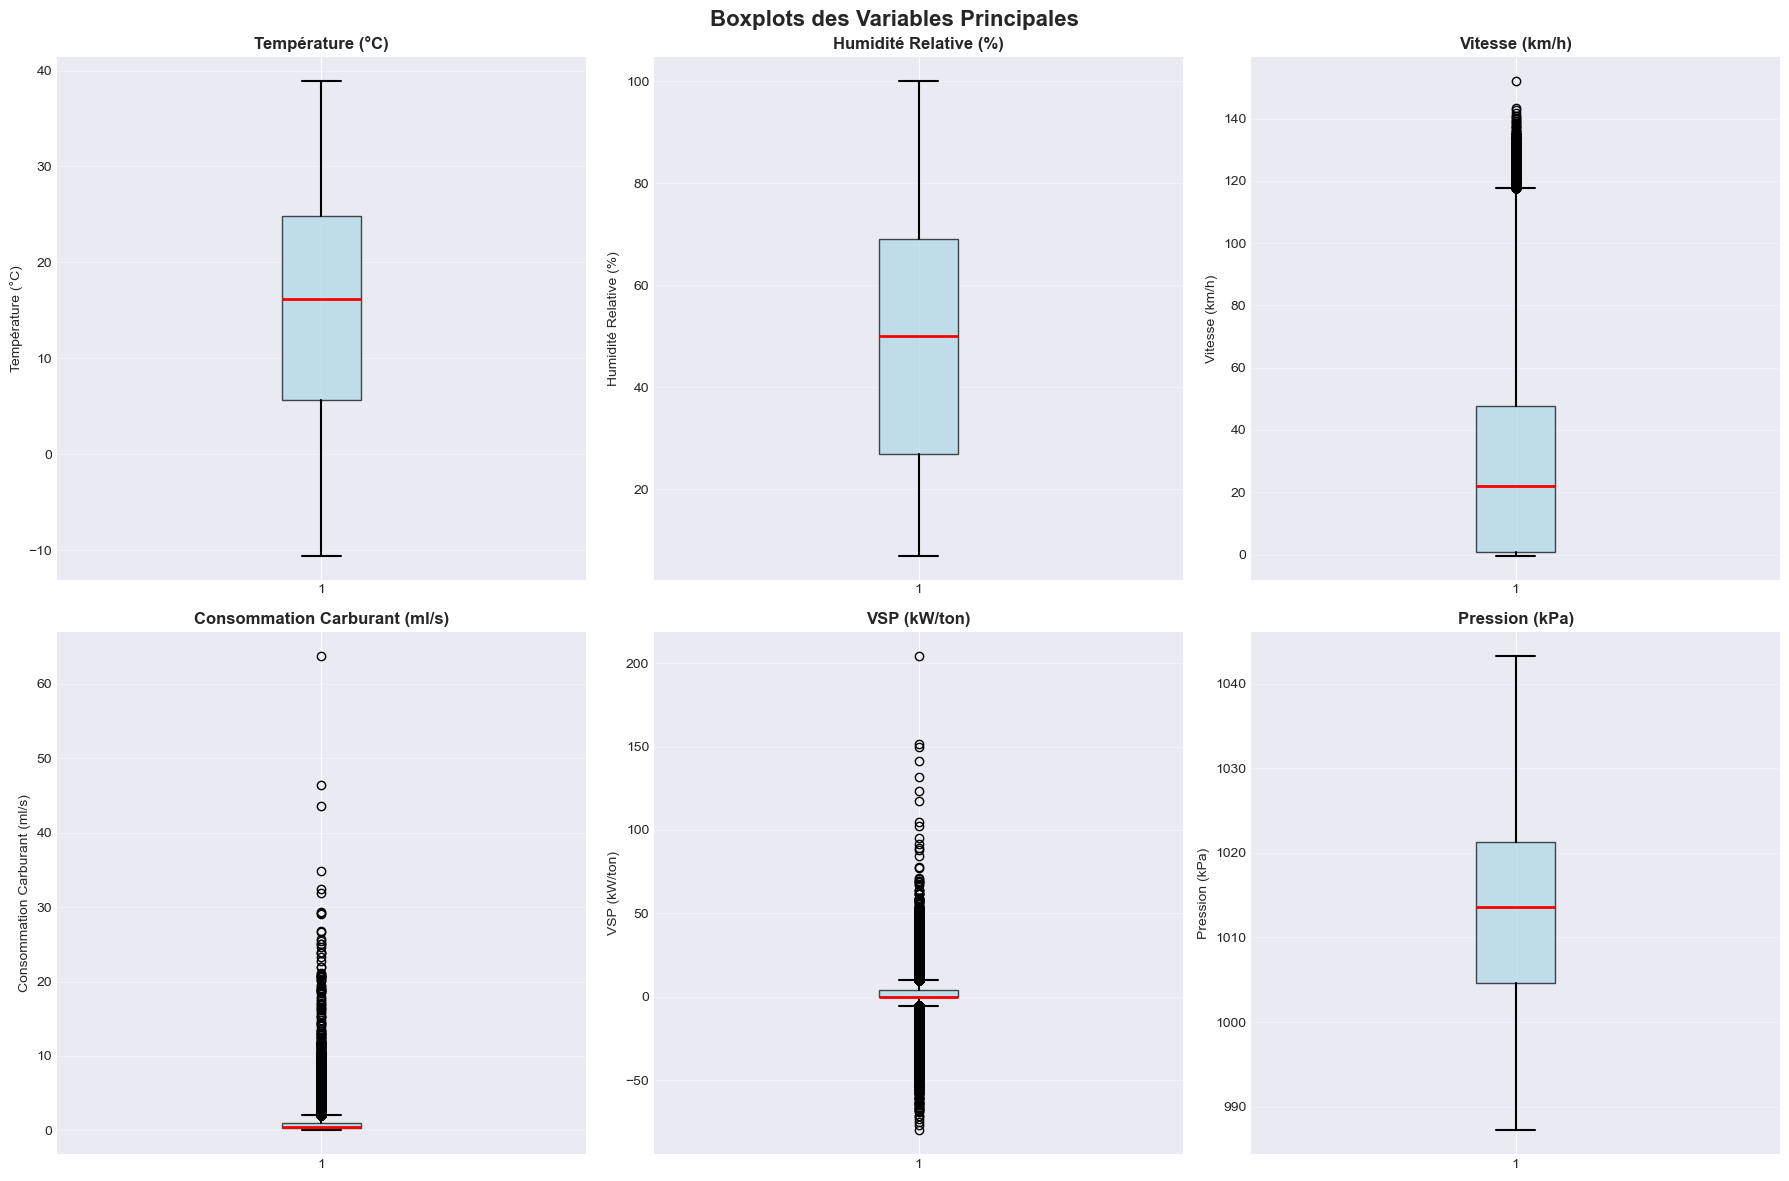

In [84]:
# 6. Boxplots pour identifier les valeurs aberrantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Boxplots des Variables Principales', fontsize=16, fontweight='bold')

variables = ['TEM (℃)', 'RHU (%)', 'SPEED (km/h)', 'FCR (ml/s)', 'VSP (kW/ton)', 'PRS (kPa)']
titles = ['Température (°C)', 'Humidité Relative (%)', 'Vitesse (km/h)', 
          'Consommation Carburant (ml/s)', 'VSP (kW/ton)', 'Pression (kPa)']

for idx, (var, title) in enumerate(zip(variables, titles)):
    ax = axes[idx // 3, idx % 3]
    
    # Boxplot
    bp = ax.boxplot(df_clean[var].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5))
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(title)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


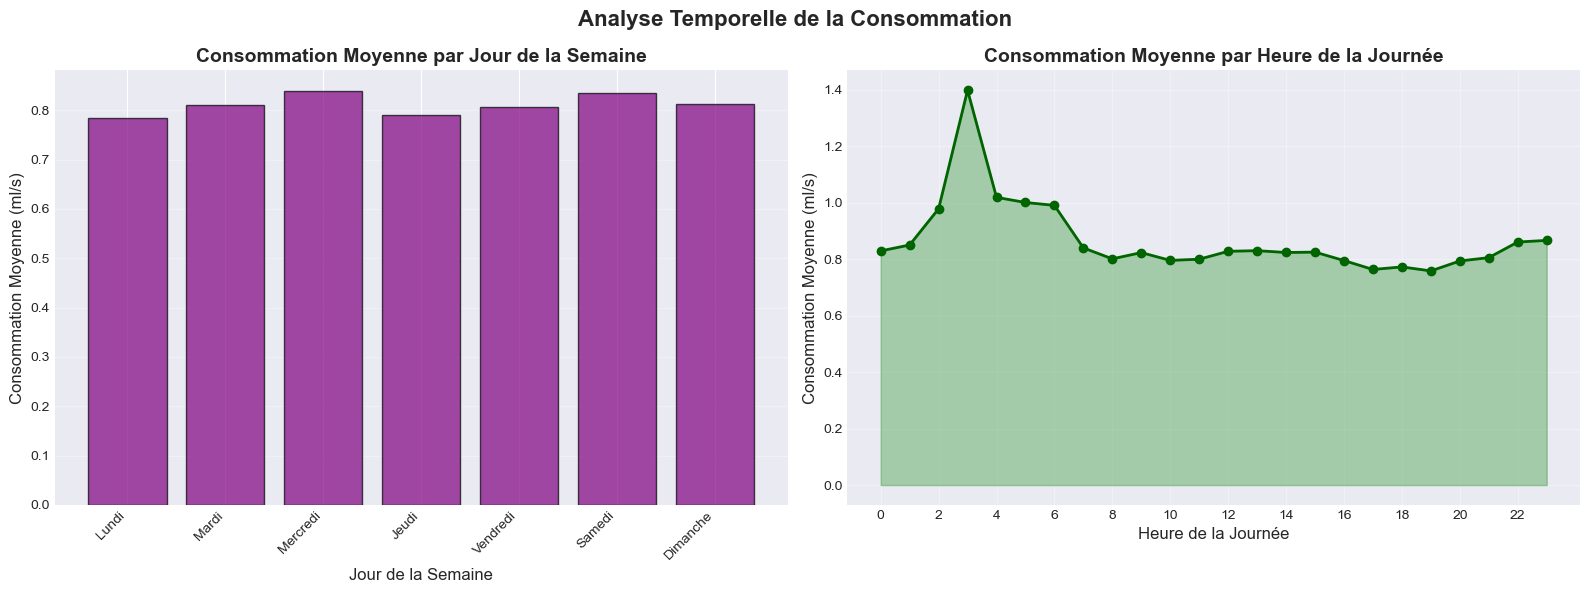

In [85]:
# 7. Répartition par jour de la semaine et par heure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Analyse Temporelle de la Consommation', fontsize=16, fontweight='bold')

# Graphique 1: Consommation moyenne par jour de la semaine
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_fr = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
day_fcr = df_clean.groupby('day_of_week')['FCR (ml/s)'].mean().reindex(day_order)
axes[0].bar(range(len(day_fcr)), day_fcr.values, color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Jour de la Semaine', fontsize=12)
axes[0].set_ylabel('Consommation Moyenne (ml/s)', fontsize=12)
axes[0].set_title('Consommation Moyenne par Jour de la Semaine', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(day_fcr)))
axes[0].set_xticklabels(day_order_fr, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Consommation moyenne par heure de la journée
hour_fcr = df_clean.groupby('hour')['FCR (ml/s)'].mean().sort_index()
axes[1].plot(hour_fcr.index, hour_fcr.values, marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[1].fill_between(hour_fcr.index, hour_fcr.values, alpha=0.3, color='green')
axes[1].set_xlabel('Heure de la Journée', fontsize=12)
axes[1].set_ylabel('Consommation Moyenne (ml/s)', fontsize=12)
axes[1].set_title('Consommation Moyenne par Heure de la Journée', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(0, 24, 2))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


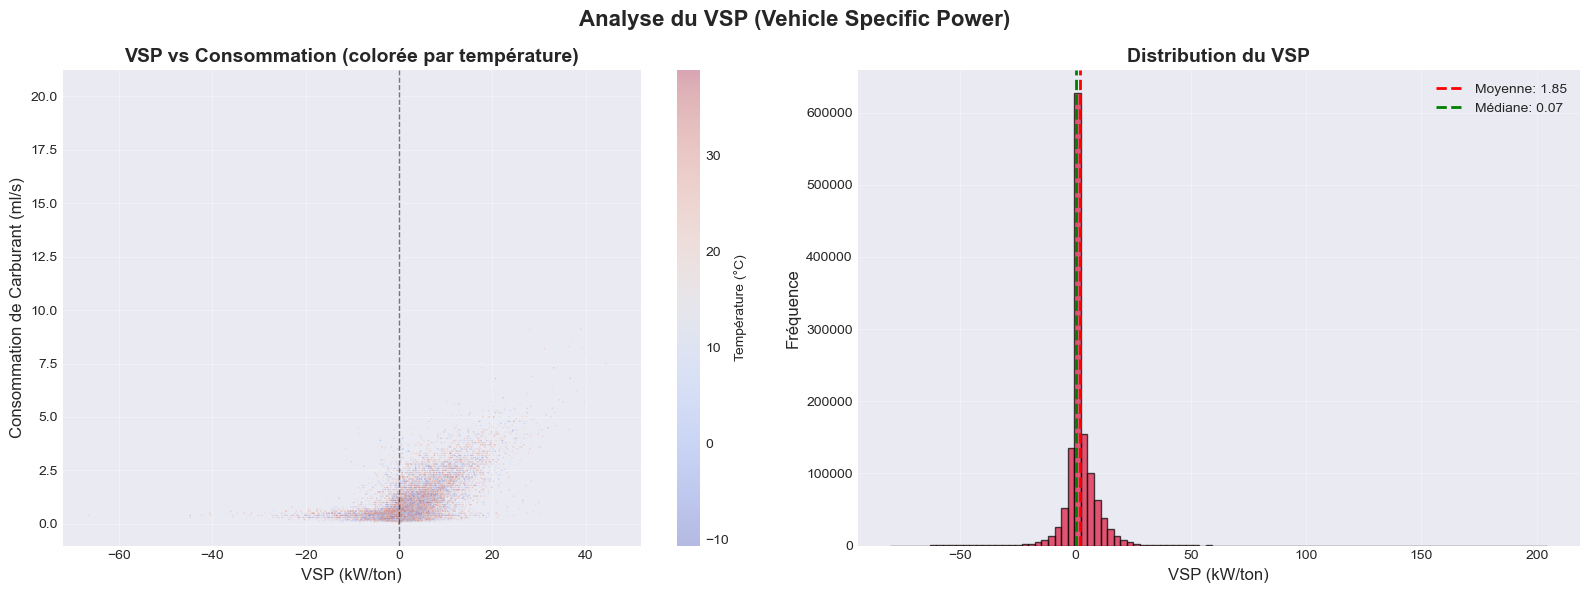

In [86]:
# 8. Relation entre VSP (Vehicle Specific Power) et consommation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Analyse du VSP (Vehicle Specific Power)', fontsize=16, fontweight='bold')

# Échantillonnage
df_sample = df_clean.iloc[::50].copy()

# Graphique 1: VSP vs Consommation
axes[0].scatter(df_sample['VSP (kW/ton)'], df_sample['FCR (ml/s)'], 
                alpha=0.3, s=1, c=df_sample['TEM (℃)'], cmap='coolwarm', edgecolors='none')
axes[0].set_xlabel('VSP (kW/ton)', fontsize=12)
axes[0].set_ylabel('Consommation de Carburant (ml/s)', fontsize=12)
axes[0].set_title('VSP vs Consommation (colorée par température)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
cbar = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar.set_label('Température (°C)', fontsize=10)

# Graphique 2: Distribution du VSP
axes[1].hist(df_clean['VSP (kW/ton)'].dropna(), bins=100, alpha=0.7, color='crimson', edgecolor='black')
axes[1].axvline(df_clean['VSP (kW/ton)'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Moyenne: {df_clean["VSP (kW/ton)"].mean():.2f}')
axes[1].axvline(df_clean['VSP (kW/ton)'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Médiane: {df_clean["VSP (kW/ton)"].median():.2f}')
axes[1].set_xlabel('VSP (kW/ton)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution du VSP', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Résumé et Conclusions

### Points clés identifiés:
1. **Dataset volumineux**: Plus de 1.2 million d'observations
2. **Période**: Données couvrant environ 1 an (2021-2022)
3. **Variables**: 9 variables principales incluant conditions environnementales et paramètres du véhicule
4. **Qualité des données**: Bonne qualité globale avec peu de valeurs manquantes après nettoyage

### Relations importantes:
- **Température vs Consommation**: Impact significatif de la température ambiante
- **Vitesse vs Consommation**: Relation non-linéaire attendue
- **VSP vs Consommation**: Corrélation forte avec la consommation de carburant

### Prochaines étapes possibles:
- Modélisation prédictive de la consommation
- Analyse de l'impact des conditions météorologiques
- Optimisation des performances du véhicule


In [87]:
# Sauvegarde du dataset nettoyé (optionnel)
# df_clean.to_csv('Vehicle_operating_data_cleaned.csv', index=False)
# print("Dataset nettoyé sauvegardé avec succès!")

# Affichage des statistiques finales
print("=" * 60)
print("RÉSUMÉ FINAL")
print("=" * 60)
print(f"\nDataset nettoyé: {len(df_clean):,} lignes × {len(df_clean.columns)} colonnes")
print(f"\nVariables principales:")
print(f"   - Température: {df_clean['TEM (℃)'].min():.1f}°C à {df_clean['TEM (℃)'].max():.1f}°C")
print(f"   - Vitesse: {df_clean['SPEED (km/h)'].min():.1f} à {df_clean['SPEED (km/h)'].max():.1f} km/h")
print(f"   - Consommation: {df_clean['FCR (ml/s)'].min():.2f} à {df_clean['FCR (ml/s)'].max():.2f} ml/s")
print(f"\nPériode: {df_clean['TIME'].min()} à {df_clean['TIME'].max()}")
print("\nAnalyse terminée!")


RÉSUMÉ FINAL

Dataset nettoyé: 1,282,033 lignes × 17 colonnes

Variables principales:
   - Température: -10.6°C à 38.9°C
   - Vitesse: -0.4 à 152.0 km/h
   - Consommation: 0.00 à 63.80 ml/s

Période: 2021-08-31 08:00:30 à 2022-12-20 21:48:30

Analyse terminée!


---

# Partie 2 : Modélisation Machine Learning

## Objectif
Entraîner un modèle de machine learning pour prédire la consommation de carburant (FCR) en temps réel en utilisant uniquement :
- **Données météorologiques** : Température, Pression, Humidité, Heat Index
- **Données des capteurs moteur/véhicule** : Vitesse, Accélération, VSP

## Approche
1. Préparation des données pour le ML
2. Sélection et engineering des features
3. Entraînement de plusieurs modèles
4. Évaluation et comparaison des performances
5. Optimisation du meilleur modèle


In [88]:
# Importation des bibliothèques pour le Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from joblib import dump, load
import time

print("Bibliothèques ML importées avec succès!")


Bibliothèques ML importées avec succès!


## 1. Préparation des Données pour le ML


In [89]:
# Sélection des features pour la prédiction
# Features météorologiques
weather_features = ['PRS (kPa)', 'TEM (℃)', 'RHU (%)', 'HI (℃)']

# Features capteurs moteur/véhicule
sensor_features = ['SPEED (km/h)', 'ACC (m/s2)', 'VSP (kW/ton)']

# Toutes les features
all_features = weather_features + sensor_features

# Variable cible
target = 'FCR (ml/s)'

print("=" * 60)
print("SÉLECTION DES FEATURES")
print("=" * 60)
print(f"\n📊 Features météorologiques ({len(weather_features)}):")
for i, feat in enumerate(weather_features, 1):
    print(f"   {i}. {feat}")

print(f"\n🚗 Features capteurs moteur/véhicule ({len(sensor_features)}):")
for i, feat in enumerate(sensor_features, 1):
    print(f"   {i}. {feat}")

print(f"\n🎯 Variable cible: {target}")
print(f"\n📋 Total features: {len(all_features)}")


SÉLECTION DES FEATURES

📊 Features météorologiques (4):
   1. PRS (kPa)
   2. TEM (℃)
   3. RHU (%)
   4. HI (℃)

🚗 Features capteurs moteur/véhicule (3):
   1. SPEED (km/h)
   2. ACC (m/s2)
   3. VSP (kW/ton)

🎯 Variable cible: FCR (ml/s)

📋 Total features: 7


In [90]:
# Création du dataset ML (suppression des valeurs manquantes)
print("=" * 60)
print("PRÉPARATION DU DATASET ML")
print("=" * 60)

# Sélection des colonnes nécessaires
ml_data = df_clean[all_features + [target]].copy()

# Suppression des valeurs manquantes
initial_count = len(ml_data)
ml_data = ml_data.dropna()
final_count = len(ml_data)

print(f"\nLignes initiales: {initial_count:,}")
print(f"Lignes après suppression des NaN: {final_count:,}")
print(f"Lignes supprimées: {initial_count - final_count:,} ({(initial_count - final_count)/initial_count*100:.2f}%)")

# Séparation features et target
X = ml_data[all_features]
y = ml_data[target]

print(f"\n✅ Dataset ML prêt:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"\n📊 Statistiques de la variable cible:")
print(f"   Moyenne: {y.mean():.3f} ml/s")
print(f"   Médiane: {y.median():.3f} ml/s")
print(f"   Écart-type: {y.std():.3f} ml/s")
print(f"   Min: {y.min():.3f} ml/s")
print(f"   Max: {y.max():.3f} ml/s")


PRÉPARATION DU DATASET ML

Lignes initiales: 1,282,033
Lignes après suppression des NaN: 1,282,033
Lignes supprimées: 0 (0.00%)

✅ Dataset ML prêt:
   Features (X): (1282033, 7)
   Target (y): (1282033,)

📊 Statistiques de la variable cible:
   Moyenne: 0.812 ml/s
   Médiane: 0.500 ml/s
   Écart-type: 0.880 ml/s
   Min: 0.000 ml/s
   Max: 63.800 ml/s


In [91]:
# Division en ensembles d'entraînement et de test
# Utilisation d'un échantillon pour accélérer l'entraînement (optionnel)
# Pour un modèle final, utiliser toutes les données

# Échantillonnage pour accélérer l'entraînement (prendre 20% des données)
# Pour production, commenter ces lignes et utiliser toutes les données
sample_size = 0.2  # Utiliser 20% des données pour l'entraînement rapide
if sample_size < 1.0:
    X_sample, _, y_sample, _ = train_test_split(
        X, y, test_size=1-sample_size, random_state=42, stratify=None
    )
    print(f"⚠️  Mode développement: utilisation de {sample_size*100:.0f}% des données ({len(X_sample):,} échantillons)")
    print(f"   Pour production, utiliser toutes les données ({len(X):,} échantillons)")
    X_ml = X_sample
    y_ml = y_sample
else:
    X_ml = X
    y_ml = y

# Division train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_ml, y_ml, test_size=0.2, random_state=42, shuffle=True
)

# Division train/validation (80% train -> 64% train, 16% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

print("\n" + "=" * 60)
print("DIVISION DES DONNÉES")
print("=" * 60)
print(f"\n📊 Ensembles de données:")
print(f"   Train: {len(X_train_final):,} échantillons ({len(X_train_final)/len(X_ml)*100:.1f}%)")
print(f"   Validation: {len(X_val):,} échantillons ({len(X_val)/len(X_ml)*100:.1f}%)")
print(f"   Test: {len(X_test):,} échantillons ({len(X_test)/len(X_ml)*100:.1f}%)")
print(f"   Total: {len(X_ml):,} échantillons")


⚠️  Mode développement: utilisation de 20% des données (256,406 échantillons)
   Pour production, utiliser toutes les données (1,282,033 échantillons)

DIVISION DES DONNÉES

📊 Ensembles de données:
   Train: 164,099 échantillons (64.0%)
   Validation: 41,025 échantillons (16.0%)
   Test: 51,282 échantillons (20.0%)
   Total: 256,406 échantillons


In [92]:
# Normalisation des données
# Utilisation de RobustScaler (plus robuste aux outliers que StandardScaler)
scaler = RobustScaler()

# Fit sur les données d'entraînement uniquement
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Conversion en DataFrame pour garder les noms de colonnes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_features, index=X_train_final.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=all_features, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_features, index=X_test.index)

print("✅ Normalisation terminée avec RobustScaler")
print(f"   Moyenne des features (train): {X_train_scaled.mean().round(3).tolist()}")
print(f"   Écart-type des features (train): {X_train_scaled.std().round(3).tolist()}")


✅ Normalisation terminée avec RobustScaler
   Moyenne des features (train): [-0.025, -0.056, 0.029, -0.036, 0.137, -0.001, 0.463]
   Écart-type des features (train): [0.614, 0.582, 0.601, 0.615, 0.596, 1.505, 1.548]


## 2. Entraînement des Modèles

Nous allons entraîner plusieurs modèles pour comparer leurs performances :
1. **Régression Linéaire** (baseline)
2. **Ridge Regression** (régularisation L2)
3. **Lasso Regression** (régularisation L1)
4. **Random Forest** (ensemble d'arbres)
5. **Gradient Boosting** (boosting)
6. **XGBoost** (gradient boosting optimisé)


In [93]:
# Fonction pour évaluer les modèles
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    """
    Évalue un modèle et retourne les métriques
    """
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Métriques
    metrics = {
        'model_name': model_name,
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'val_mae': mean_absolute_error(y_val, y_val_pred),
        'val_r2': r2_score(y_val, y_val_pred),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'test_r2': r2_score(y_test, y_test_pred),
    }
    
    return metrics, y_test_pred

print("✅ Fonction d'évaluation créée")


✅ Fonction d'évaluation créée


In [94]:
# Dictionnaire pour stocker les modèles et leurs résultats
models = {}
results = []

print("=" * 60)
print("ENTRAÎNEMENT DES MODÈLES")
print("=" * 60)

# 1. Régression Linéaire
print("\n1️⃣  Entraînement: Régression Linéaire...")
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_lr = evaluate_model(
    lr_model, X_train_scaled, y_train_final, X_val_scaled, y_val, 
    X_test_scaled, y_test, "Linear Regression"
)
metrics['train_time'] = train_time
results.append(metrics)
models['Linear Regression'] = lr_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")


ENTRAÎNEMENT DES MODÈLES

1️⃣  Entraînement: Régression Linéaire...
   ✅ Terminé en 0.02s - R² Test: 0.4696


In [95]:
# 2. Ridge Regression
print("\n2️⃣  Entraînement: Ridge Regression...")
start_time = time.time()
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_ridge = evaluate_model(
    ridge_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
    X_test_scaled, y_test, "Ridge Regression"
)
metrics['train_time'] = train_time
results.append(metrics)
models['Ridge Regression'] = ridge_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")



2️⃣  Entraînement: Ridge Regression...
   ✅ Terminé en 0.01s - R² Test: 0.4696


In [96]:
# 3. Lasso Regression
print("\n3️⃣  Entraînement: Lasso Regression...")
start_time = time.time()
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=2000)
lasso_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_lasso = evaluate_model(
    lasso_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
    X_test_scaled, y_test, "Lasso Regression"
)
metrics['train_time'] = train_time
results.append(metrics)
models['Lasso Regression'] = lasso_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")



3️⃣  Entraînement: Lasso Regression...
   ✅ Terminé en 0.02s - R² Test: 0.4386


In [97]:
# 4. Random Forest
print("\n4️⃣  Entraînement: Random Forest...")
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_rf = evaluate_model(
    rf_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
    X_test_scaled, y_test, "Random Forest"
)
metrics['train_time'] = train_time
results.append(metrics)
models['Random Forest'] = rf_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")



4️⃣  Entraînement: Random Forest...
   ✅ Terminé en 14.24s - R² Test: 0.5521


In [98]:
# 5. Gradient Boosting
print("\n5️⃣  Entraînement: Gradient Boosting...")
start_time = time.time()
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbose=0
)
gb_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_gb = evaluate_model(
    gb_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
    X_test_scaled, y_test, "Gradient Boosting"
)
metrics['train_time'] = train_time
results.append(metrics)
models['Gradient Boosting'] = gb_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")



5️⃣  Entraînement: Gradient Boosting...
   ✅ Terminé en 29.80s - R² Test: 0.5688


In [99]:
# 6. XGBoost
print("\n6️⃣  Entraînement: XGBoost...")
start_time = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
xgb_model.fit(X_train_scaled, y_train_final)
train_time = time.time() - start_time

metrics, y_pred_xgb = evaluate_model(
    xgb_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
    X_test_scaled, y_test, "XGBoost"
)
metrics['train_time'] = train_time
results.append(metrics)
models['XGBoost'] = xgb_model
print(f"   ✅ Terminé en {train_time:.2f}s - R² Test: {metrics['test_r2']:.4f}")

print("\n" + "=" * 60)
print("✅ TOUS LES MODÈLES ONT ÉTÉ ENTRAÎNÉS")
print("=" * 60)



6️⃣  Entraînement: XGBoost...
   ✅ Terminé en 0.45s - R² Test: 0.5604

✅ TOUS LES MODÈLES ONT ÉTÉ ENTRAÎNÉS


## 3. Comparaison des Performances


In [100]:
# Création d'un DataFrame pour comparer les résultats
results_df = pd.DataFrame(results)

# Tri par R² de test (meilleur en premier)
results_df = results_df.sort_values('test_r2', ascending=False)

print("=" * 60)
print("COMPARAISON DES PERFORMANCES DES MODÈLES")
print("=" * 60)
print("\n📊 Métriques sur l'ensemble de TEST:")
print("-" * 60)

# Affichage formaté
display_cols = ['model_name', 'test_r2', 'test_rmse', 'test_mae', 'train_time']
results_display = results_df[display_cols].copy()
results_display.columns = ['Modèle', 'R² Score', 'RMSE (ml/s)', 'MAE (ml/s)', 'Temps (s)']
results_display['R² Score'] = results_display['R² Score'].round(4)
results_display['RMSE (ml/s)'] = results_display['RMSE (ml/s)'].round(4)
results_display['MAE (ml/s)'] = results_display['MAE (ml/s)'].round(4)
results_display['Temps (s)'] = results_display['Temps (s)'].round(2)

print(results_display.to_string(index=False))
print("\n" + "=" * 60)
print(f"🏆 MEILLEUR MODÈLE: {results_df.iloc[0]['model_name']}")
print(f"   R² Score: {results_df.iloc[0]['test_r2']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['test_rmse']:.4f} ml/s")
print(f"   MAE: {results_df.iloc[0]['test_mae']:.4f} ml/s")
print("=" * 60)


COMPARAISON DES PERFORMANCES DES MODÈLES

📊 Métriques sur l'ensemble de TEST:
------------------------------------------------------------
           Modèle  R² Score  RMSE (ml/s)  MAE (ml/s)  Temps (s)
Gradient Boosting    0.5688       0.5822      0.3499      29.80
          XGBoost    0.5604       0.5878      0.3508       0.45
    Random Forest    0.5521       0.5933      0.3559      14.24
Linear Regression    0.4696       0.6457      0.4172       0.02
 Ridge Regression    0.4696       0.6457      0.4172       0.01
 Lasso Regression    0.4386       0.6643      0.4447       0.02

🏆 MEILLEUR MODÈLE: Gradient Boosting
   R² Score: 0.5688
   RMSE: 0.5822 ml/s
   MAE: 0.3499 ml/s


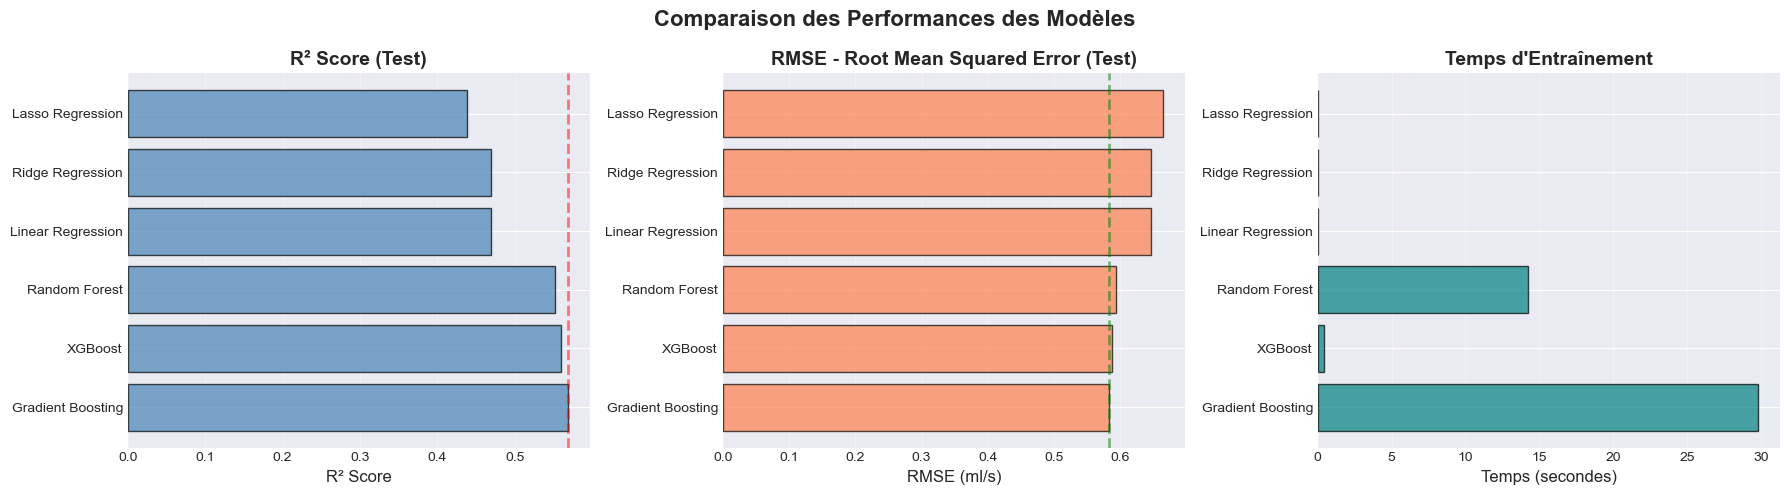

In [101]:
# Visualisation de la comparaison des modèles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparaison des Performances des Modèles', fontsize=16, fontweight='bold')

# Graphique 1: R² Score
axes[0].barh(results_df['model_name'], results_df['test_r2'], color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('R² Score (Test)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].axvline(results_df['test_r2'].max(), color='red', linestyle='--', linewidth=2, alpha=0.5)

# Graphique 2: RMSE
axes[1].barh(results_df['model_name'], results_df['test_rmse'], color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('RMSE (ml/s)', fontsize=12)
axes[1].set_title('RMSE - Root Mean Squared Error (Test)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(results_df['test_rmse'].min(), color='green', linestyle='--', linewidth=2, alpha=0.5)

# Graphique 3: Temps d'entraînement
axes[2].barh(results_df['model_name'], results_df['train_time'], color='teal', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Temps (secondes)', fontsize=12)
axes[2].set_title('Temps d\'Entraînement', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


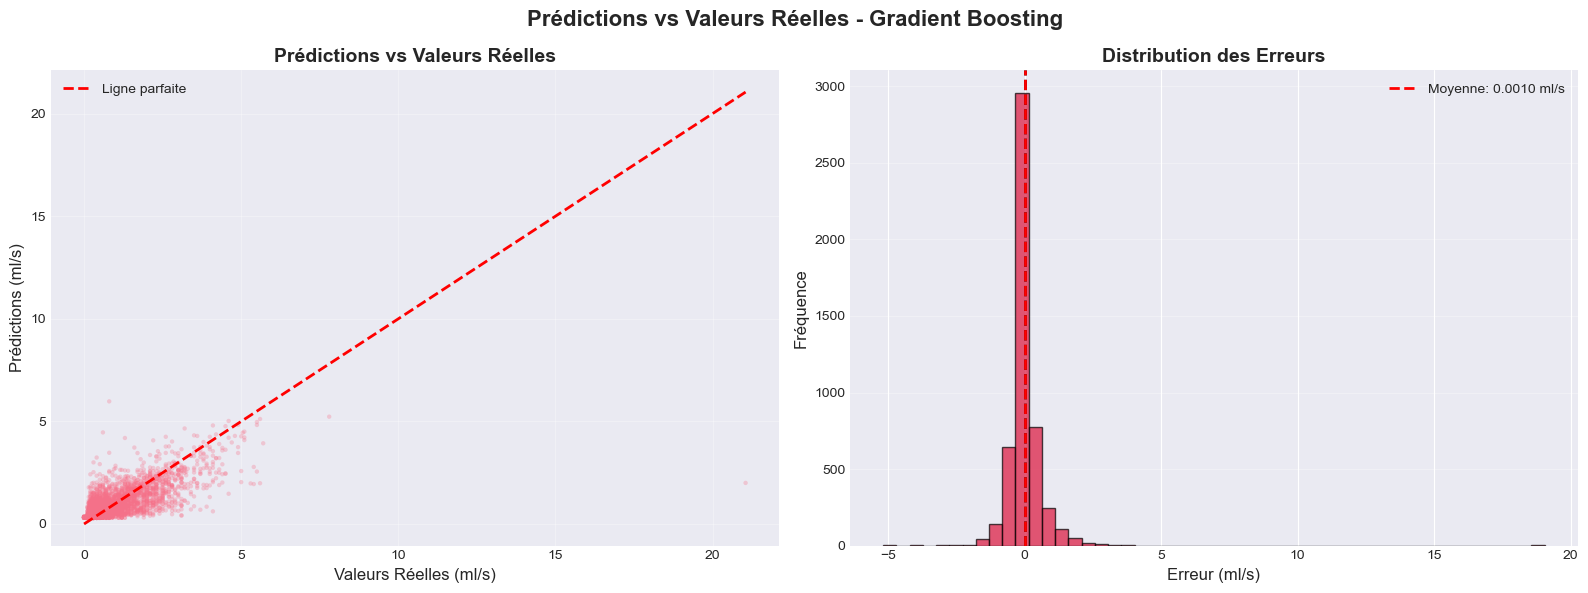


📊 Statistiques des erreurs pour Gradient Boosting:
   Erreur moyenne: 0.0010 ml/s
   Écart-type des erreurs: 0.6040 ml/s
   Erreur absolue moyenne: 0.3446 ml/s


In [102]:
# Visualisation des prédictions vs valeurs réelles pour le meilleur modèle
best_model_name = results_df.iloc[0]['model_name']
best_model = models[best_model_name]

# Prédictions du meilleur modèle
y_test_pred_best = best_model.predict(X_test_scaled)

# Échantillonnage pour la visualisation (prendre 5000 points aléatoires)
sample_idx = np.random.choice(len(y_test), size=min(5000, len(y_test)), replace=False)
y_test_sample = y_test.iloc[sample_idx]
y_pred_sample = y_test_pred_best[sample_idx]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Prédictions vs Valeurs Réelles - {best_model_name}', fontsize=16, fontweight='bold')

# Graphique 1: Scatter plot
axes[0].scatter(y_test_sample, y_pred_sample, alpha=0.3, s=10, edgecolors='none')
axes[0].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], 
             'r--', linewidth=2, label='Ligne parfaite')
axes[0].set_xlabel('Valeurs Réelles (ml/s)', fontsize=12)
axes[0].set_ylabel('Prédictions (ml/s)', fontsize=12)
axes[0].set_title('Prédictions vs Valeurs Réelles', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: Distribution des erreurs
errors = y_test_sample - y_pred_sample
axes[1].hist(errors, bins=50, alpha=0.7, color='crimson', edgecolor='black')
axes[1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[1].axvline(errors.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Moyenne: {errors.mean():.4f} ml/s')
axes[1].set_xlabel('Erreur (ml/s)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution des Erreurs', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques des erreurs pour {best_model_name}:")
print(f"   Erreur moyenne: {errors.mean():.4f} ml/s")
print(f"   Écart-type des erreurs: {errors.std():.4f} ml/s")
print(f"   Erreur absolue moyenne: {np.abs(errors).mean():.4f} ml/s")


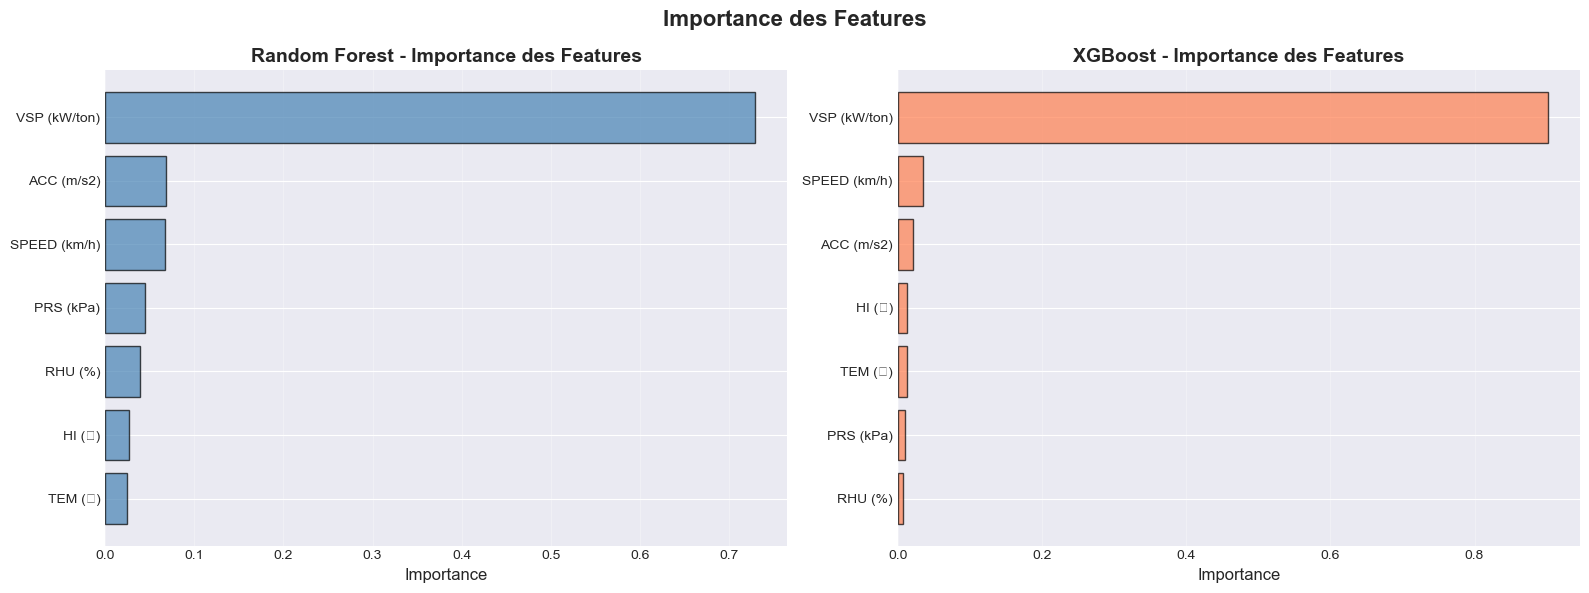


IMPORTANCE DES FEATURES

📊 Random Forest:
   TEM (℃): 0.0246
   HI (℃): 0.0266
   RHU (%): 0.0388
   PRS (kPa): 0.0452
   SPEED (km/h): 0.0675
   ACC (m/s2): 0.0681
   VSP (kW/ton): 0.7292

📊 XGBoost:
   RHU (%): 0.0078
   PRS (kPa): 0.0095
   TEM (℃): 0.0130
   HI (℃): 0.0134
   ACC (m/s2): 0.0206
   SPEED (km/h): 0.0344
   VSP (kW/ton): 0.9012


In [103]:
# Importance des features pour les modèles basés sur les arbres
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Importance des Features', fontsize=16, fontweight='bold')

# Random Forest
if hasattr(rf_model, 'feature_importances_'):
    rf_importance = pd.DataFrame({
        'feature': all_features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    axes[0].barh(rf_importance['feature'], rf_importance['importance'], 
                 color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Importance', fontsize=12)
    axes[0].set_title('Random Forest - Importance des Features', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')

# XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_importance = pd.DataFrame({
        'feature': all_features,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    axes[1].barh(xgb_importance['feature'], xgb_importance['importance'], 
                 color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Importance', fontsize=12)
    axes[1].set_title('XGBoost - Importance des Features', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Affichage des importances
print("\n" + "=" * 60)
print("IMPORTANCE DES FEATURES")
print("=" * 60)
print("\n📊 Random Forest:")
for idx, row in rf_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")
print("\n📊 XGBoost:")
for idx, row in xgb_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")


## 4. Optimisation du Meilleur Modèle

Nous allons maintenant optimiser les hyperparamètres du meilleur modèle pour améliorer ses performances.


In [104]:
# Optimisation du meilleur modèle avec GridSearchCV
print("=" * 60)
print("OPTIMISATION DES HYPERPARAMÈTRES")
print("=" * 60)
print(f"\n🎯 Optimisation du modèle: {best_model_name}")

# Sélection du modèle à optimiser selon le meilleur résultat
if 'XGBoost' in best_model_name or 'Gradient Boosting' in best_model_name:
    # Optimisation XGBoost
    print("\n🔧 Optimisation de XGBoost...")
    
    # Grille d'hyperparamètres (réduite pour accélérer)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 7],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0]
    }
    
    xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
    grid_search = GridSearchCV(
        xgb_base, param_grid, cv=3, scoring='r2', 
        n_jobs=-1, verbose=1, return_train_score=True
    )
    
    print("   Entraînement en cours... (cela peut prendre quelques minutes)")
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train_final)
    opt_time = time.time() - start_time
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"\n✅ Optimisation terminée en {opt_time:.2f}s")
    print(f"   Meilleurs paramètres: {best_params}")
    print(f"   Meilleur score CV: {best_score:.4f}")
    
    # Modèle optimisé
    optimized_model = grid_search.best_estimator_
    model_name_opt = f"{best_model_name} (Optimized)"
    
elif 'Random Forest' in best_model_name:
    # Optimisation Random Forest
    print("\n🔧 Optimisation de Random Forest...")
    
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [15, 20, 25],
        'min_samples_split': [3, 5],
        'min_samples_leaf': [2, 4]
    }
    
    rf_base = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=0)
    grid_search = GridSearchCV(
        rf_base, param_grid, cv=3, scoring='r2',
        n_jobs=-1, verbose=1, return_train_score=True
    )
    
    print("   Entraînement en cours... (cela peut prendre quelques minutes)")
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train_final)
    opt_time = time.time() - start_time
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"\n✅ Optimisation terminée en {opt_time:.2f}s")
    print(f"   Meilleurs paramètres: {best_params}")
    print(f"   Meilleur score CV: {best_score:.4f}")
    
    optimized_model = grid_search.best_estimator_
    model_name_opt = f"{best_model_name} (Optimized)"
    
else:
    print(f"\n⚠️  Optimisation non implémentée pour {best_model_name}")
    print("   Utilisation du modèle de base")
    optimized_model = best_model
    model_name_opt = best_model_name


OPTIMISATION DES HYPERPARAMÈTRES

🎯 Optimisation du modèle: Gradient Boosting

🔧 Optimisation de XGBoost...
   Entraînement en cours... (cela peut prendre quelques minutes)
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Optimisation terminée en 11.73s
   Meilleurs paramètres: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
   Meilleur score CV: 0.5783


In [105]:
# Évaluation du modèle optimisé
if optimized_model != best_model:
    metrics_opt, y_pred_opt = evaluate_model(
        optimized_model, X_train_scaled, y_train_final, X_val_scaled, y_val,
        X_test_scaled, y_test, model_name_opt
    )
    
    print("\n" + "=" * 60)
    print("COMPARAISON: Modèle Original vs Optimisé")
    print("=" * 60)
    
    comparison = pd.DataFrame({
        'Modèle': [best_model_name, model_name_opt],
        'R² Test': [results_df.iloc[0]['test_r2'], metrics_opt['test_r2']],
        'RMSE Test': [results_df.iloc[0]['test_rmse'], metrics_opt['test_rmse']],
        'MAE Test': [results_df.iloc[0]['test_mae'], metrics_opt['test_mae']]
    })
    
    print(comparison.to_string(index=False))
    
    # Amélioration
    r2_improvement = metrics_opt['test_r2'] - results_df.iloc[0]['test_r2']
    rmse_improvement = results_df.iloc[0]['test_rmse'] - metrics_opt['test_rmse']
    
    print(f"\n📈 Amélioration:")
    print(f"   R²: {r2_improvement:+.4f} ({r2_improvement/results_df.iloc[0]['test_r2']*100:+.2f}%)")
    print(f"   RMSE: {rmse_improvement:+.4f} ml/s ({rmse_improvement/results_df.iloc[0]['test_rmse']*100:+.2f}%)")
    
    # Sauvegarde du meilleur modèle
    final_model = optimized_model
    final_model_name = model_name_opt
else:
    final_model = best_model
    final_model_name = best_model_name
    print("\n✅ Utilisation du modèle de base (non optimisé)")



COMPARAISON: Modèle Original vs Optimisé
                       Modèle  R² Test  RMSE Test  MAE Test
            Gradient Boosting 0.568797   0.582198  0.349912
Gradient Boosting (Optimized) 0.559691   0.588313  0.351332

📈 Amélioration:
   R²: -0.0091 (-1.60%)
   RMSE: -0.0061 ml/s (-1.05%)


In [106]:
# Sauvegarde du modèle final et du scaler
print("\n" + "=" * 60)
print("SAUVEGARDE DU MODÈLE FINAL")
print("=" * 60)

# Sauvegarde du modèle
model_filename = 'fuel_consumption_model.joblib'
scaler_filename = 'fuel_consumption_scaler.joblib'

dump(final_model, model_filename)
dump(scaler, scaler_filename)

print(f"\n✅ Modèle sauvegardé: {model_filename}")
print(f"✅ Scaler sauvegardé: {scaler_filename}")
print(f"\n📋 Modèle final: {final_model_name}")
print(f"   R² Score: {results_df.iloc[0]['test_r2']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['test_rmse']:.4f} ml/s")
print(f"   MAE: {results_df.iloc[0]['test_mae']:.4f} ml/s")

# Création d'un fichier avec les informations du modèle
model_info = {
    'model_name': final_model_name,
    'features': all_features,
    'target': target,
    'test_r2': float(results_df.iloc[0]['test_r2']),
    'test_rmse': float(results_df.iloc[0]['test_rmse']),
    'test_mae': float(results_df.iloc[0]['test_mae']),
    'n_samples_train': len(X_train_final),
    'n_samples_test': len(X_test)
}

import json
with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)

print(f"✅ Informations du modèle sauvegardées: model_info.json")



SAUVEGARDE DU MODÈLE FINAL

✅ Modèle sauvegardé: fuel_consumption_model.joblib
✅ Scaler sauvegardé: fuel_consumption_scaler.joblib

📋 Modèle final: Gradient Boosting (Optimized)
   R² Score: 0.5688
   RMSE: 0.5822 ml/s
   MAE: 0.3499 ml/s
✅ Informations du modèle sauvegardées: model_info.json


## 5. Fonction de Prédiction en Temps Réel

Création d'une fonction pour faire des prédictions en temps réel avec de nouvelles données.


In [107]:
def predict_fuel_consumption(prs, temp, rhu, hi, speed, acc, vsp, model=None, scaler_obj=None):
    """
    Prédit la consommation de carburant en temps réel
    
    Paramètres:
    -----------
    prs : float
        Pression atmosphérique (kPa)
    temp : float
        Température ambiante (°C)
    rhu : float
        Humidité relative (%)
    hi : float
        Heat Index (°C)
    speed : float
        Vitesse du véhicule (km/h)
    acc : float
        Accélération (m/s²)
    vsp : float
        Vehicle Specific Power (kW/ton)
    model : modèle entraîné (optionnel, charge depuis fichier si None)
    scaler_obj : scaler entraîné (optionnel, charge depuis fichier si None)
    
    Retourne:
    --------
    float : Prédiction de la consommation de carburant (ml/s)
    """
    # Chargement du modèle et du scaler si non fournis
    if model is None:
        model = load('fuel_consumption_model.joblib')
    if scaler_obj is None:
        scaler_obj = load('fuel_consumption_scaler.joblib')
    
    # Création du DataFrame avec les features dans le bon ordre
    features_dict = {
        'PRS (kPa)': [prs],
        'TEM (℃)': [temp],
        'RHU (%)': [rhu],
        'HI (℃)': [hi],
        'SPEED (km/h)': [speed],
        'ACC (m/s2)': [acc],
        'VSP (kW/ton)': [vsp]
    }
    
    input_data = pd.DataFrame(features_dict)
    
    # Normalisation
    input_scaled = scaler_obj.transform(input_data)
    
    # Prédiction
    prediction = model.predict(input_scaled)[0]
    
    return max(0, prediction)  # S'assurer que la prédiction n'est pas négative

print("✅ Fonction de prédiction créée!")

# Test avec un exemple
print("\n" + "=" * 60)
print("TEST DE LA FONCTION DE PRÉDICTION")
print("=" * 60)
print("\nExemple de prédiction:")
print("Conditions:")
print("  - Pression: 1013.25 kPa")
print("  - Température: 20°C")
print("  - Humidité: 50%")
print("  - Heat Index: 20°C")
print("  - Vitesse: 60 km/h")
print("  - Accélération: 0.5 m/s²")
print("  - VSP: 5 kW/ton")

example_pred = predict_fuel_consumption(
    prs=1013.25,
    temp=20.0,
    rhu=50.0,
    hi=20.0,
    speed=60.0,
    acc=0.5,
    vsp=5.0
)

print(f"\n🎯 Prédiction de consommation: {example_pred:.4f} ml/s")
print(f"   (soit {example_pred * 3.6:.2f} ml/h ou {example_pred * 3.6 / 1000:.4f} L/h)")


✅ Fonction de prédiction créée!

TEST DE LA FONCTION DE PRÉDICTION

Exemple de prédiction:
Conditions:
  - Pression: 1013.25 kPa
  - Température: 20°C
  - Humidité: 50%
  - Heat Index: 20°C
  - Vitesse: 60 km/h
  - Accélération: 0.5 m/s²
  - VSP: 5 kW/ton

🎯 Prédiction de consommation: 1.0343 ml/s
   (soit 3.72 ml/h ou 0.0037 L/h)


In [108]:
# Résumé final
print("=" * 60)
print("RÉSUMÉ FINAL DE LA MODÉLISATION")
print("=" * 60)
print(f"\n✅ Modélisation terminée avec succès!")
print(f"\n📊 Modèle final: {final_model_name}")
print(f"   R² Score: {results_df.iloc[0]['test_r2']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['test_rmse']:.4f} ml/s")
print(f"   MAE: {results_df.iloc[0]['test_mae']:.4f} ml/s")
print(f"\n📁 Fichiers sauvegardés:")
print(f"   - {model_filename}")
print(f"   - {scaler_filename}")
print(f"   - model_info.json")
print(f"\n🎯 Le modèle est prêt pour la prédiction en temps réel!")
print("=" * 60)


RÉSUMÉ FINAL DE LA MODÉLISATION

✅ Modélisation terminée avec succès!

📊 Modèle final: Gradient Boosting (Optimized)
   R² Score: 0.5688
   RMSE: 0.5822 ml/s
   MAE: 0.3499 ml/s

📁 Fichiers sauvegardés:
   - fuel_consumption_model.joblib
   - fuel_consumption_scaler.joblib
   - model_info.json

🎯 Le modèle est prêt pour la prédiction en temps réel!
